In [1]:
import pickle
import pandas as pd
import os
import sys
sys.path
from scipy import stats
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
with open('../../Downloads/regret_epsper_0.001.pkl','rb') as f:
    t3 = pickle.load(f)
    
#regret_None818twoshortmajunstagg12.pkl
#regret_None818twoshortmajsmall.pkl

In [29]:
t.keys()

dict_keys(['case_three'])

In [3]:
def get_regret(p):
    to_return={}
    for time,dicts in p.items():
        for person,sims in dicts.items():
            if person not in to_return:
                to_return[person]={}
            for sim,r in sims.items():
                if time not in to_return[person]:
                    to_return[person][time]=[]
                to_return[person][time].append(r)
                
    for person in to_return:
        #for sim in to_return[person]:
            to_return[person]={t:np.array(to_return[person][t]) for t in sorted(to_return[person])}
                
    return to_return

In [4]:
test = get_regret(t['case_three'])

NameError: name 't' is not defined

In [5]:
def to_days(person):
    tr = {}
    for time,regret in person.items():
        
        date = time.date()
        if date not in tr:
                tr[date]=[]
        tr[date].append(regret)
    keylist = list(tr.keys())
    return {i:np.array(tr[keylist[i]]).mean() for i in range(len(keylist))}

In [6]:
def alls(d):
    big = {}
    for person,values in d.items():
        #print(person)
        #print(len(set([v.date() for v in values])))
        z=to_days(values)
        for k,v in z.items():
            if k not in big:
                big[k]=[]
            big[k].append(v)
    
    #print(np.array(big).T.shape)
    return [np.array(big[t]).mean() for t in sorted(big)]
#np.array(big).mean(axis=0)

In [30]:
testt = alls(test)

In [411]:
rt = get_regret(t['case_two']['or'])

In [348]:
with open('../distributions_rl4rl/time_to_active_participants_pop_32_short_unstaggered_12rn.pkl','rb') as f:
    rr = pickle.load(f)

In [84]:
#rr[pd.Timestamp('2015-10-02 19:00:00')]

In [14]:
b= alls(get_regret(t['case_two']['or']))

In [7]:
def get_all_three(ty):
    to_return={}
    #,'case_two','case_three'
    #'case_one','case_two','case_three'
    for case in ['case_three']:
        tt= get_results_new_save_person('../../Downloads/pooling_results_testing/{}/'.format(ty),'32',7,case,'burden829quick2rev_','inc')
        to_return[case]=tt
    return to_return

In [8]:
def get_all_three_hob(ty):
    to_return={}
    for case in ['case_one','case_two','case_three']:
        tt= get_results_new_save_person('../../Downloads/pooling_results_testing/{}/'.format(ty),'32',7,case,'None829longgen_cond_inc','?')
        to_return[case]=tt
    return to_return

In [9]:
def get_results_new_save_person(results_path,pop_size,update_time,case,phrase,ophrase):
    
    
    files = os.listdir('{}{}'.format(results_path,case))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and ophrase not in f and 'update_days_{}'.format(update_time) in f  and '2015' not in f    ]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    to_return = {}
    to_returno = {}
    for ff in files:
        sim = int(ff.split('sim_')[1].split('_')[0])
        
        #try:
        with open('{}{}/{}'.format(results_path,case,ff),'rb') as f:
            d = pickle.load(f)
     
            #print(d.keys())
            if len(d)>0:
                to_return[sim]=d['pregret']
                to_returno[sim]=d['poregret']
    to_save = {}
    to_saveo = {}
    for sim in range(50):
        for person in range(32):
            for time,regret in to_return[sim][person].items():
                if time not in to_save:
                    to_save[time]={}
                if time not in to_saveo:
                    to_saveo[time]={}
                if person not in to_save[time]:
                    to_save[time][person]={}
                if person not in to_saveo[time]:
                    to_saveo[time][person]={}
                to_save[time][person][sim]=regret
                to_saveo[time][person][sim]=to_returno[sim][person][time]
    return {'r':to_save,'or':to_saveo}


In [38]:
tt= get_results_new_save_person('../../Downloads/pooling_results_testing/batch/','32',7,'case_three','burden818twotimesaveshortnegative','inc')


In [10]:
batch = get_all_three('batch')

In [137]:
#batch['case_one']['or'][pd.Timestamp('2015-08-27 15:00:00')][1][1]

In [401]:
hob_inc = get_all_three_hob('hob_clipped')

In [381]:
hob = get_all_three('hob_clipped')

In [11]:
personalized = get_all_three('personalized')

In [40]:
rbatch = get_regret(tt)

In [41]:
testbatch = alls(rbatch)

In [525]:
with open('batch_regret_notime_unstag.pkl','wb') as f:
    pickle.dump(batch,f)

In [17]:
def get_weekly_averages(points):
    to_return = []
    sems = []
    for i in range(0,len(points),7):
        temp = points[i:i+7]
        to_return.append(np.array(temp).mean())
        #print(temp)
        #print(len(temp))
        sems.append(stats.sem(temp))
    return to_return,sems

In [25]:
def plot_all_special_regret(batch,personalized,pooled,hob,hobwrong,pn):
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout( w_pad=2.5, h_pad=1.0)

    #'case_one','case_two',
    #,'case_two','case_three'
    #'case_one','case_two','case_three'
    cases = ['case_three','case_three','case_three']
    plt.setp(ax[:],  yticks = np.arange(.4, .85, step=0.10),ylim = [.4,.85])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    #'Homogenous','Bi-modal',
    
    titles = ['Homogenous','Bi-modal','Smooth']
    offset = 5
    for i in range(len(cases)):
            if i==0:
                plt.setp(ax[0],  yticks = np.arange(0.00, .25, step=0.05),ylim = [0.025,.23])
                ax[i].set_ylabel('Average weekly regret')
            if i==1:
                
                plt.setp(ax[1],  yticks = np.arange(0.00, .25, step=0.05),ylim = [0.025,.23])
                ax[i].set_xlabel('Week in study')
            if i==2:
                plt.setp(ax[2],  yticks = np.arange(0.05, .25, step=0.05),ylim = [0.025,.23])
            ax[i].set_title(titles[i])
            
            b =get_weekly_averages(alls(get_regret(batch[cases[i]]['or'])))
            #print(b)
            #labels = ['{}'.format(i) for i in range(0,len(b),15) ]
            #yerr=b[1],
            #[i for i in range(len(b[0]))],
            ax[i].errorbar([i for i in range(len(b[0]))],b[0],yerr=b[1],fmt='o-',label='Complete-pooling')
            
            #print(len([b[j] for j in range(0,len(b),25)]))
          
            p =get_weekly_averages(alls(get_regret(personalized[cases[i]]['or'])))
            #yerr=p[1],
            #[i for i in range(len(p[0]))]
            ax[i].errorbar([i for i in range(len(p[0]))],p[0],yerr=p[1],fmt='+-',label='Person-specific')
         
            po =get_weekly_averages(alls(get_regret(pooled[cases[i]]['or'])))
            #temp_burden[cases[i]]
            #get_weekly_averages(alls(get_regret(pooled[cases[i]]['or'])))
            #print(po)
            #yerr=po[1],
            ax[i].errorbar([i for i in range(len(po[0]))],po[0],yerr=po[1],label='IntelligentPooling')
            
            #if len(hob[cases[i]])>0:
            #h =get_weekly_averages(alls(get_regret(hob[cases[i]]['or'])))
            #print(po)
            #yerr=po[1],
            #ax[i].errorbar([i for i in range(len(h[0]))],h[0],yerr=h[1],label='HOB-Oracle')
            
            #if len(hobwrong[cases[i]])>0:
            h =get_weekly_averages(alls(get_regret(hobwrong[cases[i]]['or'])))
            #print(po)
            #yerr=po[1],
            
            ax[i].errorbar([i for i in range(len(h[0]))],h[0],yerr=h[1],label='HOB')
            
            
            #h =get_weekly_averages(hobwrong[cases[i]]['regrets'])
            #print(po)
            #yerr=po[1],
            #ax[i].errorbar([i for i in range(len(h[0]))],h[0],yerr=h[1],label='HOB-Incorrect')
            
            #xx=[i for i in range(int(len([b[j] for j in range(0,len(b),offset)])/4),len([b[j] for j in range(0,len(b),offset)]),int(len([b[j] for j in range(0,len(b),offset)])/4))]
            #print(xx)
            #print([j for j in range(0,len(b),offset)])
            xx = [i for i in range(0,12,2)]
            labels = ['{}'.format(i) for i in range(1,12,2) ]
            #labels = ['{}'.format(i*offset) for i in xx ]
            
            #print(labels)
            #print(xx)
            #print(len(labels))
            #print(len(xx))
            ax[i].set_xticks(xx)
            ax[i].set_xticklabels(labels)
    plt.legend(bbox_to_anchor=(1.15, .5)) 
    #plt.savefig('temp_plots/regret_trial_number_staggered_noburden_hob_{}.pdf'.format(pn),dpi=300, bbox_inches='tight',)
    
    

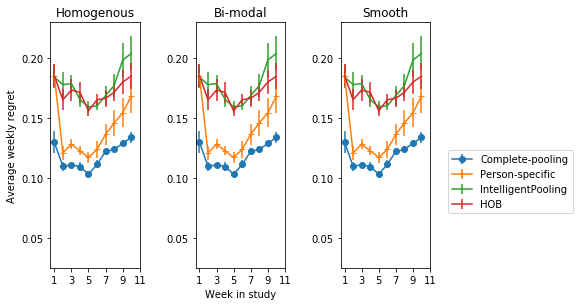

In [28]:
plot_all_special_regret(batch,personalized,t2,{},t3,'0')

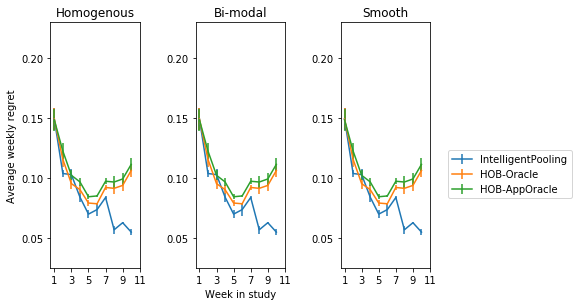

In [339]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

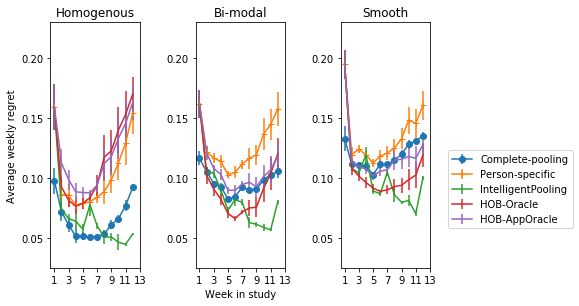

In [253]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

No handles with labels found to put in legend.


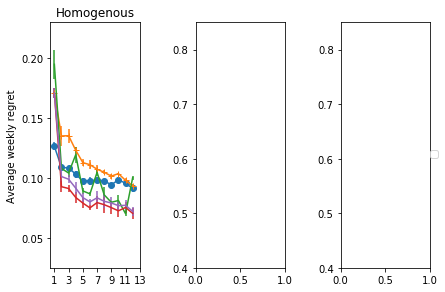

In [281]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

TypeError: 'numpy.float64' object is not iterable

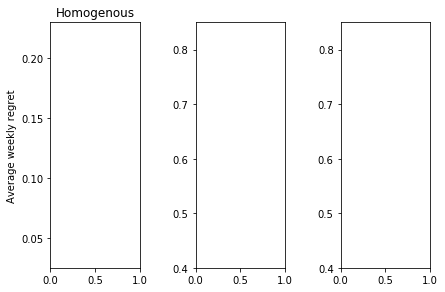

In [274]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

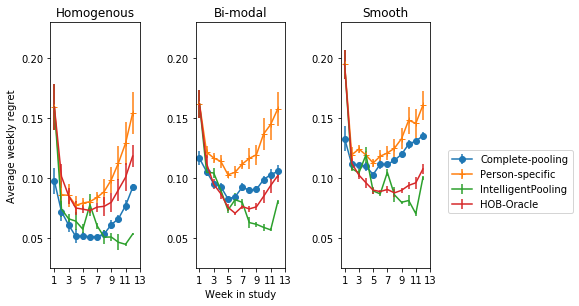

In [208]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

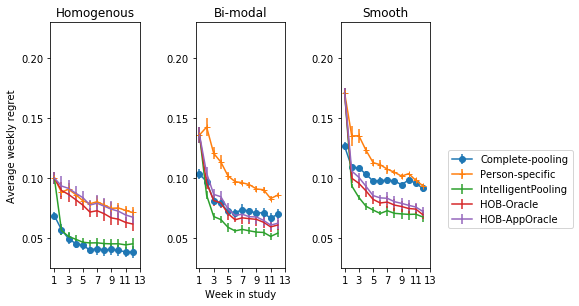

In [198]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

No handles with labels found to put in legend.


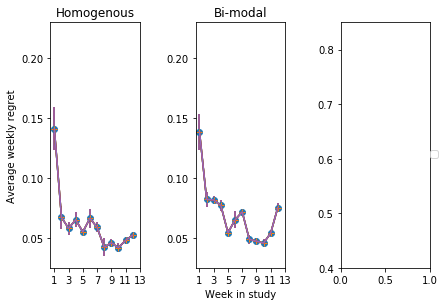

In [156]:
plot_all_special_regret(t,t,t,t,t,'0')

No handles with labels found to put in legend.


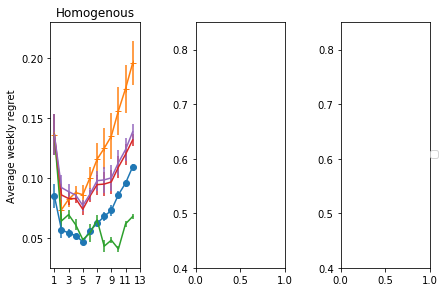

In [635]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

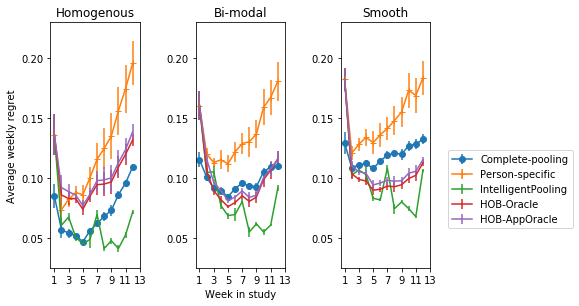

In [629]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

KeyError: 'case_three'

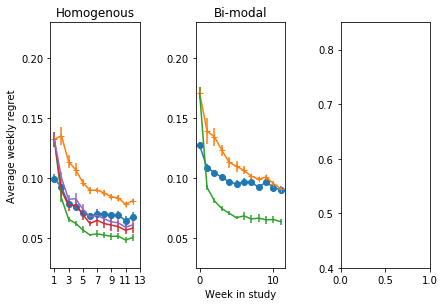

In [594]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

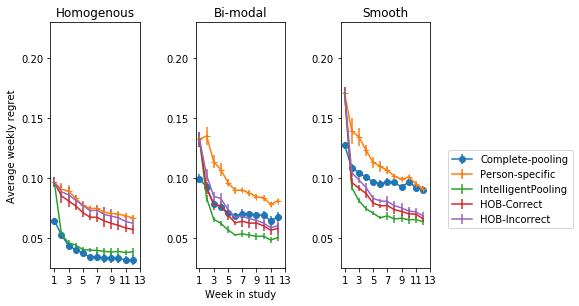

In [469]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

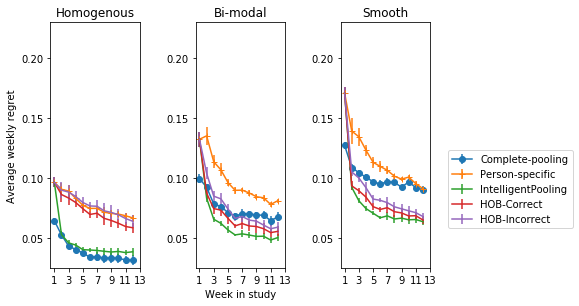

In [446]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

In [ ]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

In [196]:
temp_none  = {'case_three':[[0.17111828819931102,
  0.09343296705763245,
  0.08374565529621882,
  0.07640809483109487,
  0.07325465489590101,
  0.07040300257147214,
  0.07268682950560902,
  0.07050929954581565,
  0.07001395212395557,
  0.06963859735625376,
  0.06976267040901014,
  0.06745494742035509],
 [0.004114747441089815,
  0.0018724332865285237,
  0.0021694593866105126,
  0.002808964322510837,
  0.0024455001096867486,
  0.0016295909325038471,
  0.004032178208003224,
  0.004180696758795676,
  0.00419010604183877,
  0.004313669220805976,
  0.003916197797586225,
  0.0038886189883489833]],'case_two':[[0.13597931547619047,
  0.0856436011904762,
  0.06779010416666667,
  0.0653095238095238,
  0.05884040178571429,
  0.0558436755952381,
  0.05707425595238096,
  0.05589322916666667,
  0.05482931547619047,
  0.0545343005952381,
  0.051213541666666675,
  0.053982678091397854],
 [0.0064522135260526615,
  0.003487436976349443,
  0.0026285254664644565,
  0.002969620999079017,
  0.0036520435679119395,
  0.0018058816911621673,
  0.003499510506920054,
  0.0028064267103488907,
  0.003790959509708036,
  0.0032150623324056515,
  0.0026255307593614618,
  0.0033876404810076425]],'case_one':[[0.1000172619047619,
  0.056183184523809535,
  0.05113311011904763,
  0.048859300595238096,
  0.04637328869047619,
  0.045754166666666665,
  0.04587135416666667,
  0.04523169642857144,
  0.04500282738095239,
  0.0450734375,
  0.044165773809523814,
  0.04503117079493087],
 [0.004606966805767897,
  0.004015177663038852,
  0.003896209032502864,
  0.003360154201323625,
  0.0037033798819798023,
  0.0028860318774261385,
  0.004389097848079362,
  0.003806151953780643,
  0.0041993920785366665,
  0.004012070961755006,
  0.0034529447306138866,
  0.004534546757523992]]}

KeyError: 'case_two'

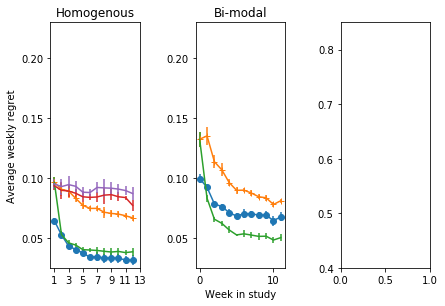

In [207]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

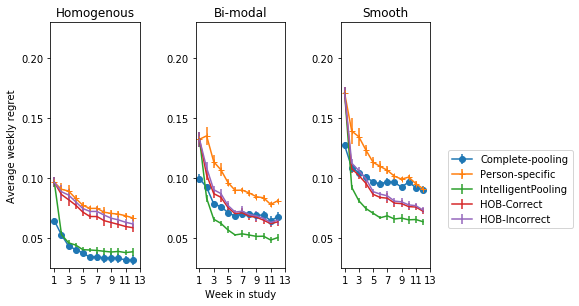

In [191]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

KeyError: 'case_two'

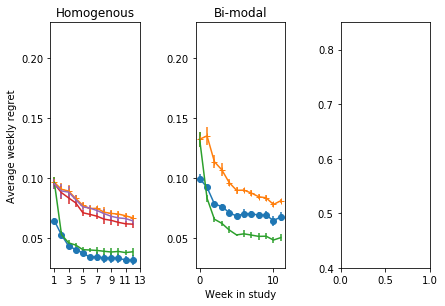

In [175]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

KeyError: 'case_two'

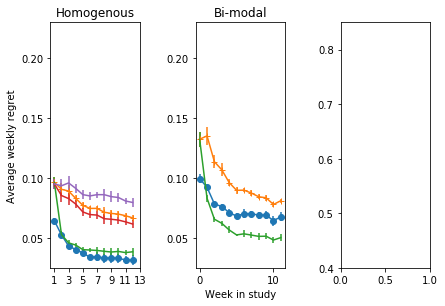

In [145]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

In [195]:
temp_burden = {'case_one':[[0.1593906994047619,
  0.07410535714285715,
  0.06594241071428572,
  0.06401525297619047,
  0.05726071428571428,
  0.07772991071428571,
  0.06018199404761905,
  0.05061190476190477,
  0.05072247023809524,
  0.04631949404761904,
  0.04461145833333333,
  0.05316490015360984],[0.018877172475692403,
  0.006835162229955456,
  0.003968101251789189,
  0.007434132009205352,
  0.004154998684773793,
  0.009076149709242072,
  0.0026416361189176025,
  0.0059207758762205775,
  0.003334527961750552,
  0.006609713573897935,
  0.0013968248457033683,
  0.0011441491036170187]],'case_two':[[0.16193898809523807,
  0.1048139136904762,
  0.10421845238095237,
  0.08981822916666668,
  0.07323296130952381,
  0.08184962797619047,
  0.0797625,
  0.06276145833333334,
  0.06133035714285714,
  0.05880498511904762,
  0.05666755952380953,
  0.08025348742319507],
 [0.011743261666209728,
  0.0035103487646994547,
  0.004000924420557425,
  0.003889920913187674,
  0.0028006071871766788,
  0.00551570980920047,
  0.0023703963694080084,
  0.004446032549305147,
  0.0022688893671867294,
  0.002712367526042073,
  0.001185534690162893,
  0.0016815232461172944]],'case_three':[[0.19500973409690953,
  0.10797713770133152,
  0.1041811789229657,
  0.11944429658324976,
  0.08923976518978738,
  0.08674059181478687,
  0.10473246237451492,
  0.0859571280804702,
  0.07972979046902269,
  0.08120959778883814,
  0.07024267913283266,
  0.10025980664523769],
 [0.011986951414548369,
  0.0024401498548398204,
  0.003239397906947978,
  0.006858963507076159,
  0.002745906902252401,
  0.0018687551149074624,
  0.0026568556647743186,
  0.006381418535431025,
  0.001380287746090487,
  0.004577482198967705,
  0.001905681200535595,
  0.0015220257500368835]]}

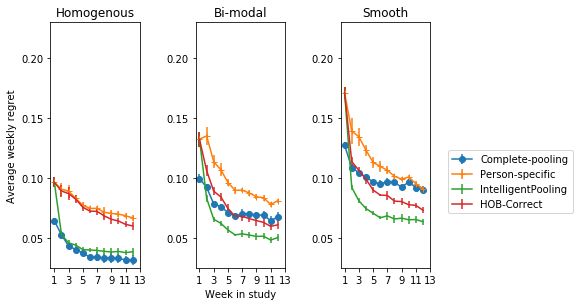

In [99]:
plot_all_special_regret(batch,personalized,t,hob,{},'0')

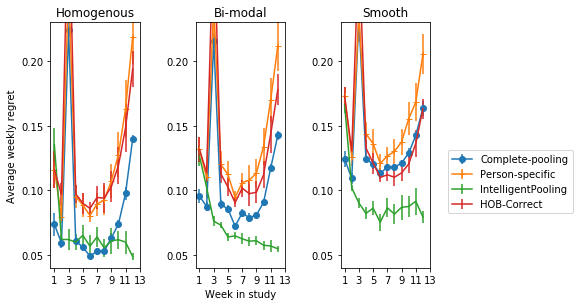

In [26]:
plot_all_special_regret(batch,personalized,t,hob,{},'0')

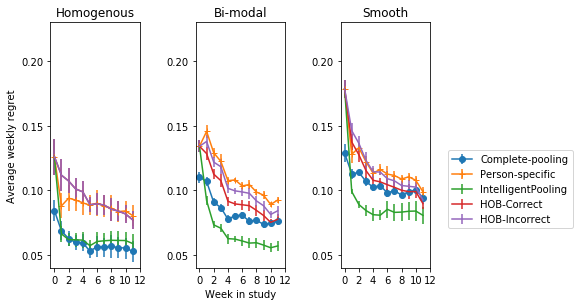

In [467]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

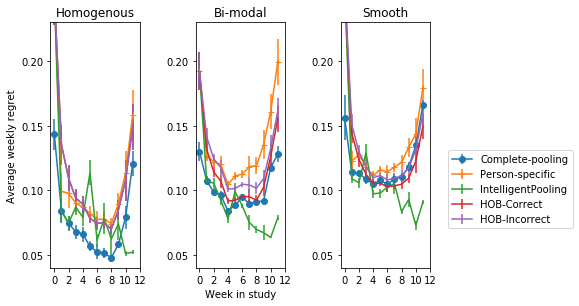

In [457]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

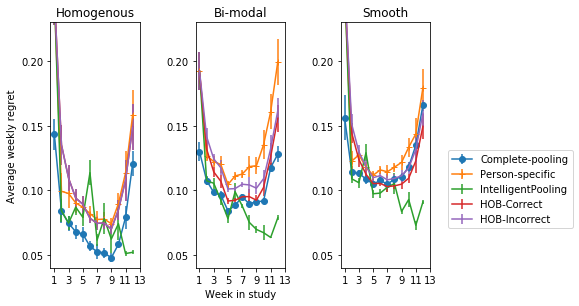

In [498]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

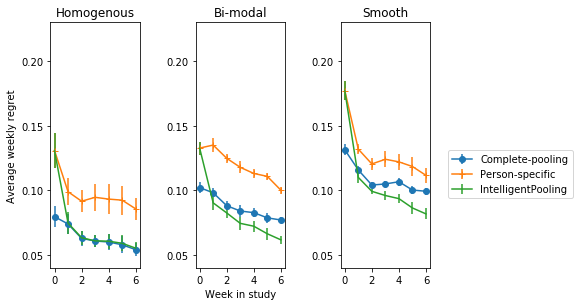

In [188]:
plot_all_special_regret(batch,personalized,t,hob,hob_inc,'0')

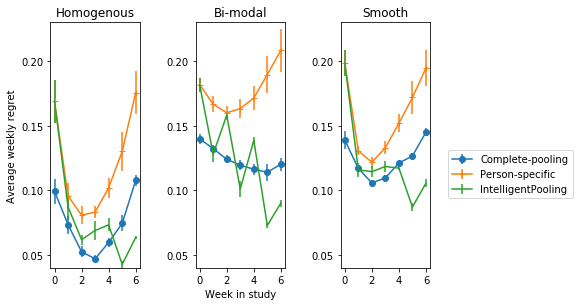

In [200]:
plot_all_special_regret(batch,personalized,t,{},{},'0')

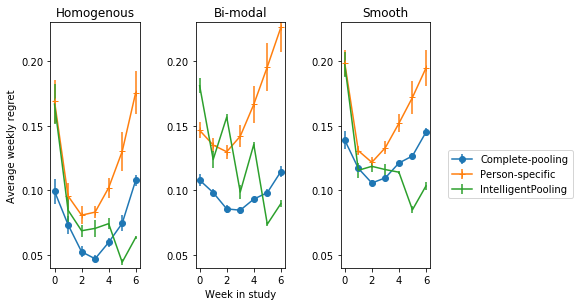

In [195]:
plot_all_special_regret(batch,personalized,t,{},{},'0')

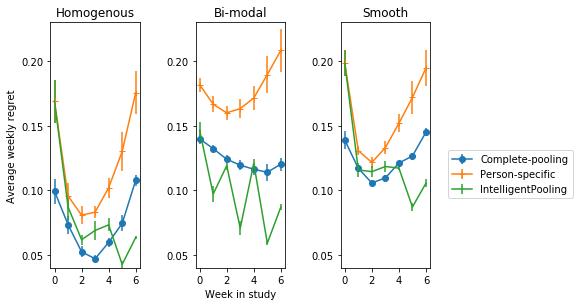

In [202]:
plot_all_special_regret(batch,personalized,t,{},{},'0')

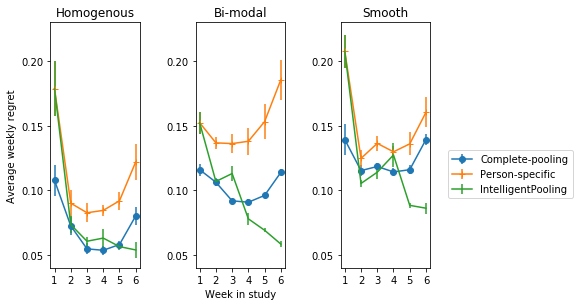

In [281]:
plot_all_special_regret(batch,personalized,t,{},{},'0')

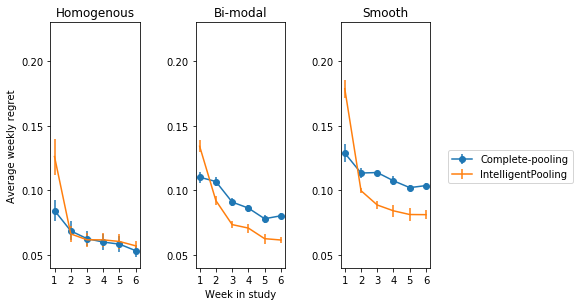

In [288]:
plot_all_special_regret(batch,personalized,t,{},{},'0')

TypeError: unsupported operand type(s) for /: 'list' and 'int'

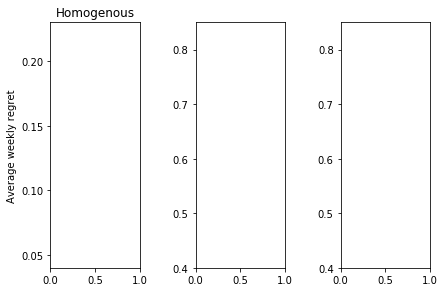

In [296]:
plot_all_special_regret(batch,personalized,t,hob,{},'0')

In [133]:
np.dot([0.3 ,  0.25, .2, 0.15,  0.1 ,  0.05,  0.  , -0.05, -0.1 , -0.15,-0.2 , -.25, -0.15,  0.2,  0.3, -0.3 ],[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])+-.2

0.04999999999999999